## Load an image

In [1]:
from image import load
from pathlib import Path

# Office PC
#file_path = Path("/home/luis/Documents/GitHub/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"

# Personal laptop
file_path = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif"

cal_image = load(file_path, for_calib = True)

### Get calibration

Number of images detected: 9


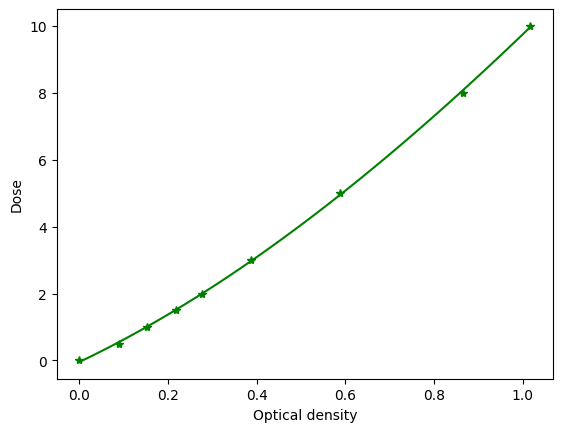

<Axes: xlabel='Optical density', ylabel='Dose'>

In [2]:
cal = cal_image.get_calibration(doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10], channel = "G", field_in_film = True)
cal.plot(color = 'green')

## Film to dose

In [3]:
cal.popt # Coeficients used by the fit function.

array([-0.04277797,  6.30913712,  4.05265265, -0.56727947])

In [4]:
cal.optical_density

[-0.0,
 0.0886622102434701,
 0.1527450671954092,
 0.21726770346989474,
 0.27664875375928594,
 0.3873000420542609,
 0.5882259453651357,
 0.8640219238957344,
 1.0169659030152558]

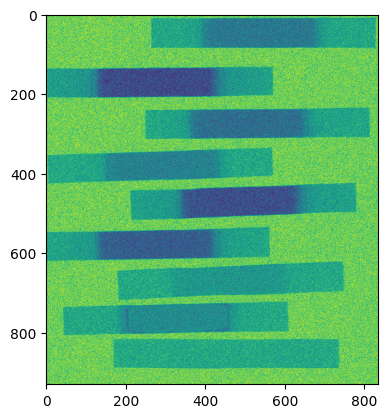

In [5]:
from calibration import polynomial_g3
import matplotlib.pyplot as plt
#from matplotlib.pyplot import fig
import numpy as np

from skimage.filters.rank import mean_percentile, mean
from skimage.morphology import disk

d = polynomial_g3(cal_image.array[:,:,1], *cal.popt)
plt.imshow(d)

### Test dose image

/home/luis/miniconda3/envs/dp/lib/python3.10/site-packages/skimage/filters/rank/generic.py:268: UserWarning: Bad rank filter performance is expected due to a large number of bins (65435), equivalent to an approximate bitdepth of 16.0.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


Number of images detected: 8


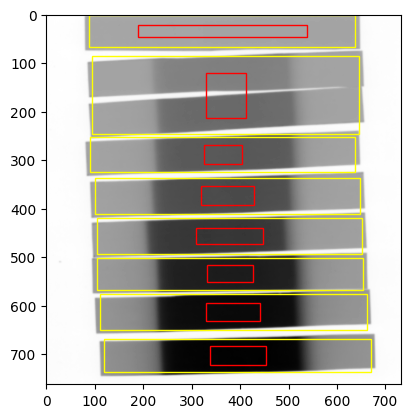

mean, standar deviation


[(45035, 151),
 (36624, 95),
 (27197, 228),
 (23833, 203),
 (18488, 149),
 (11494, 130),
 (6482, 156),
 (4395, 146)]

In [6]:
test_image_path = Path("/home/luis/Descargas") / "POS 11 SIN CARTULINA.tif"
test_image = load(test_image_path)

footprint = disk(3)
#for i in [0,1,2]:
#    test_image.array[:,:,i] = mean_percentile(test_image.array[:,:,i], footprint=footprint, p0=.05, p1=.95)

#test_image.array[:,:,1] = mean_percentile(test_image.array[:,:,1], footprint=footprint, p0=.05, p1=.95)
test_image.array[:,:,1] = mean(test_image.array[:,:,1], footprint=footprint)

mean_pixel, std = test_image.get_stat(ch = "G", field_in_film = True, ar = 0.4, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)

print("mean, standar deviation")
list(zip(mean_pixel, std))

In [7]:
-np.log10(4383/45027)

1.011701541668775

In [8]:
-np.log10(np.array(mean_pixel)/mean_pixel[0])

array([-0.        ,  0.08978439,  0.21902917,  0.27637145,  0.38666023,
        0.59307897,  0.84184114,  1.01059129])

In [9]:
dosis_list = -np.log10(np.array(mean_pixel)/mean_pixel[0])

In [10]:
polynomial_g3(dosis_list, *cal.popt)

array([-0.04277797,  0.55594288,  1.52756734,  1.99845879,  2.96981757,
        5.00618862,  7.80216945,  9.8866382 ])

In [11]:
optical_density = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

dose_image = polynomial_g3(optical_density, *cal.popt)

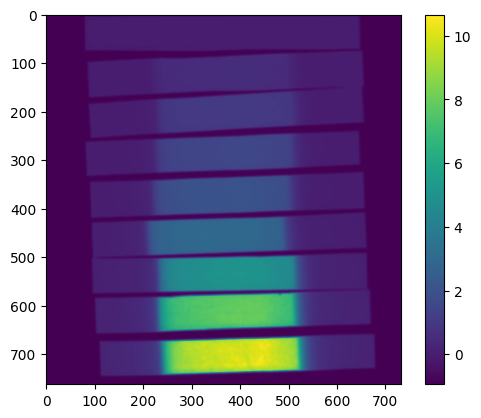

In [12]:
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_image)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)

(array([194103., 201187.,  49592.,  36529.,  20140.,  12175.,   9353.,
         11468.,  11215.,  12754.]),
 array([-0.15822585, -0.0353341 ,  0.08755766,  0.21044941,  0.33334117,
         0.45623293,  0.57912468,  0.70201644,  0.82490819,  0.94779995,
         1.0706917 ]),
 <BarContainer object of 10 artists>)

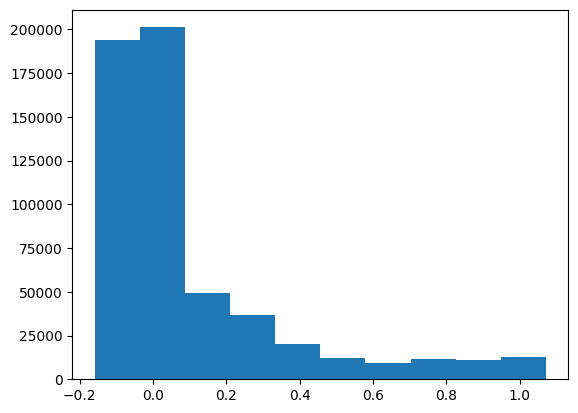

In [13]:
do = -np.log10(test_image.array[:,:,1]/mean_pixel[0])

plt.hist(do.ravel())

### Mean channel

Number of images detected: 9


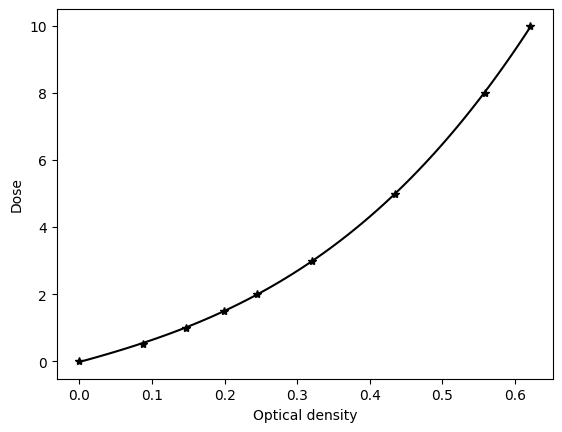

<Axes: xlabel='Optical density', ylabel='Dose'>

In [18]:
cal = cal_image.get_calibration(doses = [0, 0.5, 1,1.5, 2, 3, 5, 8, 10], channel = "mean", field_in_film = True)
cal.plot(color = 'k')

Number of images detected: 8


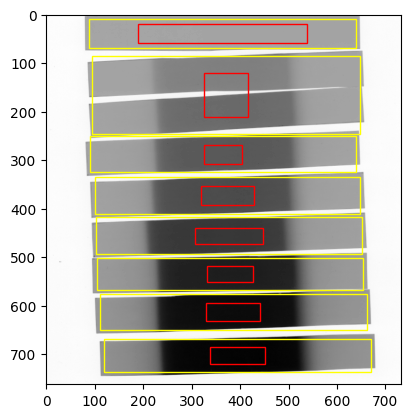

In [19]:
test_image_path = Path("/home/luis/Descargas") / "POS 11 SIN CARTULINA.tif"
test_image = load(test_image_path)

ref, _ = test_image.get_stat(ch = "mean", field_in_film = True, ar = 0.4, show = True)
ref = sorted(mean_pixel, reverse = True)

In [20]:
dosis_list = -np.log10(np.array(ref)/mean_pixel[0])
polynomial_g3(dosis_list, *cal.popt)

array([-0.02233759,  0.5415457 ,  1.48152209,  1.93765039,  2.90995811,
        4.95850869,  7.78300846,  9.62084625])